In [ ]:
import torch
from utils.DataUtils.Visualization import plot_curves

def MinSNRLoss_weight(alpha_bar_t):
    gamma = 5.0
    factor = (1 / alpha_bar_t - 1) * gamma
    weight = torch.minimum(factor, torch.ones_like(alpha_bar_t))
    return weight

def SigmoidLoss_weight(alpha_bar_t):
    bias = -3.0
    logsnr = torch.log(alpha_bar_t / (1 - alpha_bar_t))
    weight = torch.sigmoid(bias - logsnr)
    return weight

In [4]:
from model.BetaScheduler import LinearBetaScheduler

scheudler=LinearBetaScheduler(timesteps=1000)

time=torch.arange(1,1000)
alpha_bar_t=scheudler.get_alpha_bar(time)
alpha_bar_t = torch.squeeze(alpha_bar_t)

group={
    "minsnr":MinSNRLoss_weight(alpha_bar_t),
    "sigmoid":SigmoidLoss_weight(alpha_bar_t),
}

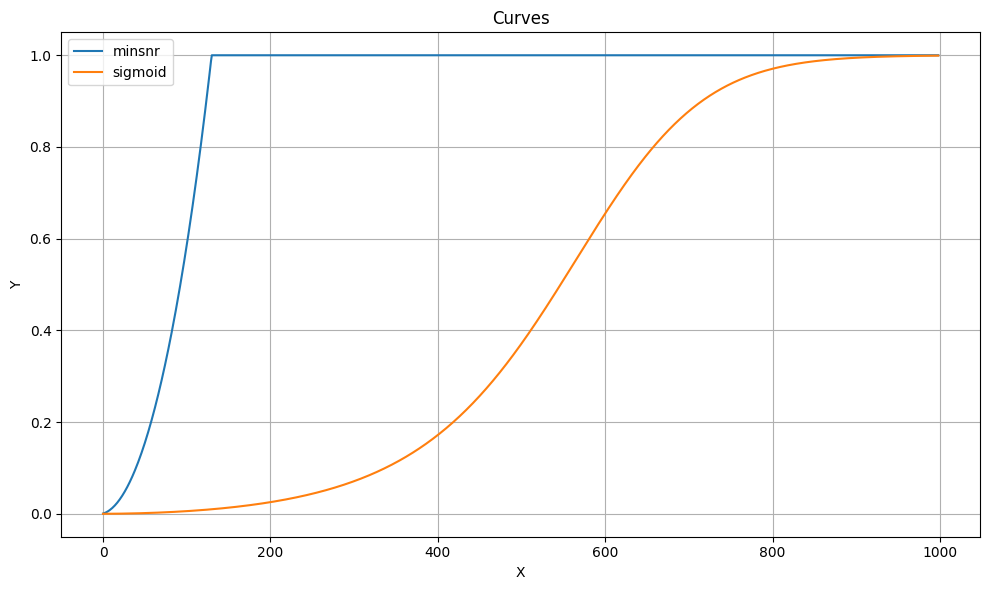

In [5]:
plot_curves(
    group
)